In [48]:
import pandas as pd
import numpy as np
import math
import statistics as st
import scipy.stats as scst
import matplotlib.pyplot as plt
import pylab

In [49]:
# read dataset
old_cars = pd.read_csv('oldcars.csv')

In [50]:
old_cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [51]:
#(a)
petrol_cars = old_cars[old_cars['Fuel_Type'] == 'Petrol']
len(petrol_cars)

239

In [52]:
diesel_cars = old_cars[old_cars['Fuel_Type'] == 'Diesel']
len(diesel_cars)

60

In [53]:
#(b)
manual_cars = old_cars[old_cars['Transmission'] == 'Manual']
len(manual_cars)

261

In [55]:
#(c)
# sample mean
st.mean(old_cars['Selling_Price'])

4.661295681063123

In [56]:
# sample trimmed mean
scst.trim_mean(old_cars['Selling_Price'], 0.2)

3.543756906077348

In [ ]:
# since the trimmed mean is lower than the original mean, there are some outliers with very high selling prices that increases 
# the whole dataset's mean, therefore the distribution of selling price is not symmetric.

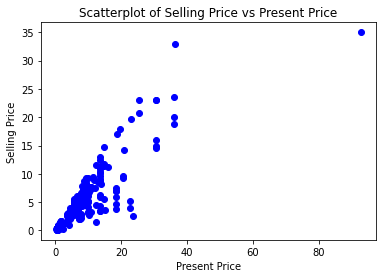

In [57]:
# (d)
plt.scatter(old_cars['Present_Price'], old_cars['Selling_Price'], color = "b")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.title("Scatterplot of Selling Price vs Present Price")
plt.show()

In [58]:
# correlation coefficient
np.corrcoef(old_cars['Present_Price'], old_cars['Selling_Price'])[0, 1]

0.8789825451614951

In [ ]:
# The selling price and present price have a positive association relationship.

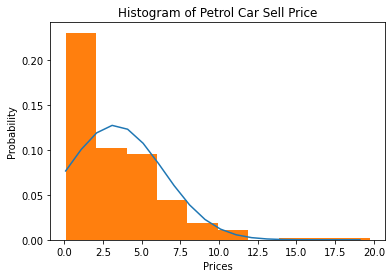

In [59]:
# (e)
# Show historgram
# Show QQ plot
# Use normality test
l1 = list(np.arange(min(petrol_cars['Selling_Price']), max(petrol_cars['Selling_Price'])))
y1 = scst.norm.pdf(l1, loc = st.mean(petrol_cars['Selling_Price']), scale = st.stdev(petrol_cars['Selling_Price']))
plt.plot(l1, y1)
plt.hist(petrol_cars['Selling_Price'], bins = None, range = None, density = True)
plt.title("Histogram of Petrol Car Sell Price")
plt.xlabel('Prices')
plt.ylabel('Probability')
plt.show()

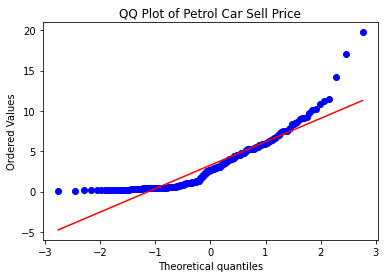

In [62]:
scst.probplot(petrol_cars['Selling_Price'], dist = "norm", plot = pylab)
pylab.title('QQ Plot of Petrol Car Sell Price')
pylab.show()

In [63]:
scst.shapiro(petrol_cars['Selling_Price'])

ShapiroResult(statistic=0.8486546277999878, pvalue=1.50893244432607e-14)

In [ ]:
# From the Normality test, the p value is very small, which gives us enough evidence to reject the null hypothesis that
# the Selling price is normally distributed. From the Histogram and QQPlot, we can observe that the distribution has a
# shorter than normal left tail and longer than normal right tail.

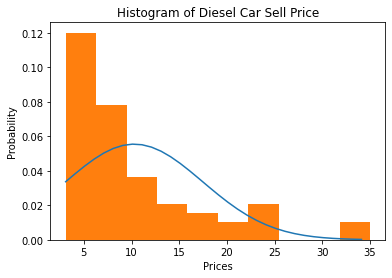

In [65]:
# (f)
l2 = list(np.arange(min(diesel_cars['Selling_Price']), max(diesel_cars['Selling_Price'])))
y2 = scst.norm.pdf(l2, loc = st.mean(diesel_cars['Selling_Price']), scale = st.stdev(diesel_cars['Selling_Price']))
plt.plot(l2, y2)
plt.hist(diesel_cars['Selling_Price'], bins = None, range = None, density = True)
plt.title("Histogram of Diesel Car Sell Price")
plt.xlabel('Prices')
plt.ylabel('Probability')
plt.show()

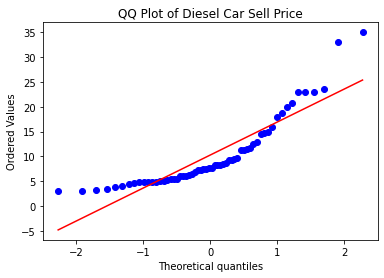

In [66]:
scst.probplot(diesel_cars['Selling_Price'], dist = "norm", plot = pylab)
pylab.title('QQ Plot of Diesel Car Sell Price')
pylab.show()

In [67]:
scst.shapiro(diesel_cars['Selling_Price'])

ShapiroResult(statistic=0.816650927066803, pvalue=3.600152922444977e-07)

In [ ]:
# From the Normality test, the p value is very small (0.0000003 < 0.05), which gives us enough evidence to reject the null hypothesis that
# the Selling price is normally distributed. From the Histogram and QQPlot, we can observe that the distribution has a
# shorter than normal left tail and longer than normal right tail. This is similar to the petrol car sell price.

In [ ]:
# (g)
# Since there is no dependency between petrol car and diesel car, a test for 2 sample data should be conducted.
# Assumption: although the data is not normally distributed, the data size is large enough (> 30).
# However, the p value for variance equality test is very small (2 cells below), therefore the null hypothesis that 
# the variance is equal is rejected. A parametric test cannot be used.
# The best approach is to use a 2 independent sample, non parametric test.

In [68]:
scst.bartlett(petrol_cars['Selling_Price'], diesel_cars['Selling_Price'])

BartlettResult(statistic=83.48193736267704, pvalue=6.430081430609673e-20)

In [69]:
scst.levene(petrol_cars['Selling_Price'], diesel_cars['Selling_Price'])

LeveneResult(statistic=30.64755945456746, pvalue=6.807902241792097e-08)

In [70]:
scst.mannwhitneyu(diesel_cars['Selling_Price'], petrol_cars['Selling_Price'], alternative="greater")

MannwhitneyuResult(statistic=12467.0, pvalue=4.512000852649989e-19)

In [ ]:
# Since the p value is very small (< 0.01), the null hypothesis that the average selling price of petrol cars is equal
# to the average selling price of diesel car is rejected. The alternative hypothesis, average selling price of diesel 
# cars is greater than average selling price of petrol car is accepted.